In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from scipy.special import gamma
from math import pi


def getS50(ne: np.ndarray, s: np.ndarray):
    """Get S50 from NKG function.

    Input:
        ne: Ne of Event.
        s: age of Event.

    Output:
        S50
    """
    rm = 130.0
    r = 50.0
    nr = ne / (rm * rm)
    gg1 = gamma(4.5 - s)
    gg2 = 2 * pi * gamma(s) * gamma(4.5 - 2 * s)
    rr1 = pow(r / rm, s - 2)
    rr2 = pow(1 + r / rm, s - 4.5)
    return nr * gg1 / gg2 * rr1 * rr2

In [3]:
data = np.load(f"/cxtmp/hky/ICRCdata/gamma_test_with_dgl.npz")
data = {key: data[key] for key in data}

In [4]:
data["S50"] = getS50(data["ne"], data["age"])
data["prie"] = np.log10(data["prie"] / 1000)
data["S50"] = np.log10(data["S50"])
data["ne"] = np.log10(data["ne"])
data["sumpf"] = np.log10(data["sumpf"])
data["pritheta"] = np.rad2deg(data["pritheta"])
data["deltatheta"] = data["theta"] - data["pritheta"]

data["priphi"] = 180 - np.rad2deg(data["priphi"])
data["priphi"][data["priphi"] > 180] = data["priphi"][data["priphi"] > 180] - 360
data["deltaphi"] = data["phi"] - data["priphi"]
data["deltaphi"][data["deltaphi"] < -180] += 360
data["deltaphi"][data["deltaphi"] > 180] -= 360

data["GIN_theta"] = np.rad2deg(data["GIN_theta"])
data["deltaGIN_theta"] = data["GIN_theta"] - data["pritheta"]
data["GIN_phi"] = 180 - np.rad2deg(data["GIN_phi"])
data["GIN_phi"][data["GIN_phi"] > 180] = data["GIN_phi"][data["GIN_phi"] > 180] - 360
data["deltaGIN_phi"] = data["GIN_phi"] - data["priphi"]
data["deltaGIN_phi"][data["deltaGIN_phi"] < -180] += 360
data["deltaGIN_phi"][data["deltaGIN_phi"] > 180] -= 360

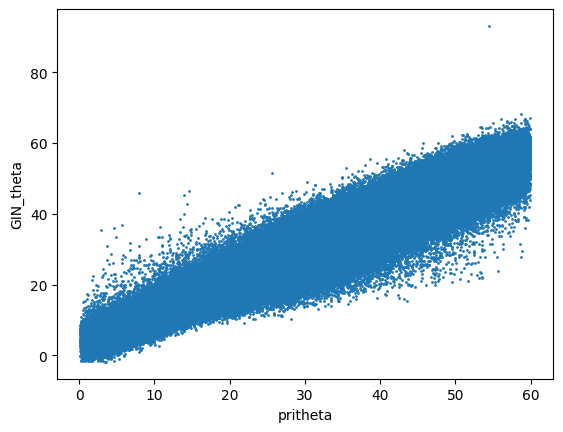

In [5]:
plt.scatter(data["pritheta"], data["GIN_theta"], s=1)
plt.xlabel("pritheta")
plt.ylabel("GIN_theta")
plt.show()

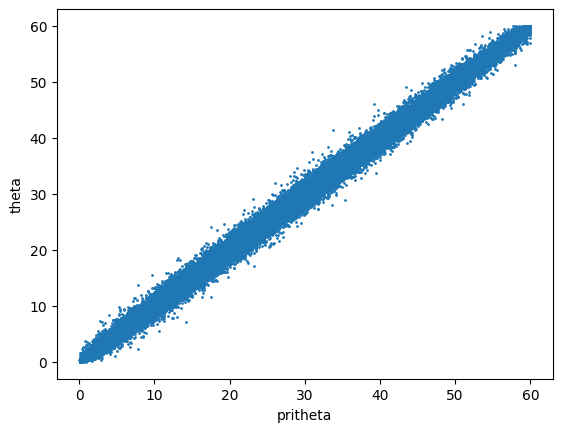

In [6]:
plt.scatter(data["pritheta"], data["theta"], s=1)
plt.xlabel("pritheta")
plt.ylabel("theta")
plt.show()

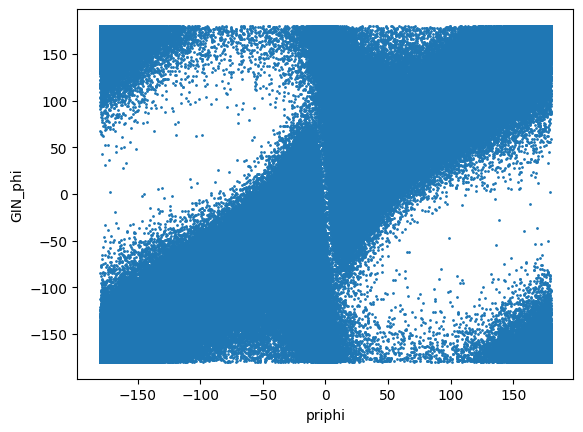

In [7]:
plt.scatter(data["priphi"], data["GIN_phi"], s=1)
plt.xlabel("priphi")
plt.ylabel("GIN_phi")
plt.show()

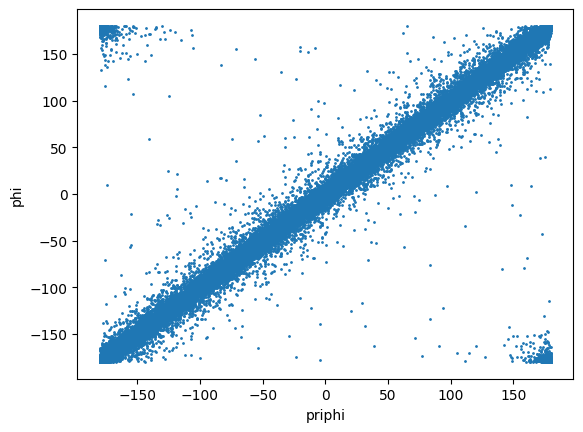

In [8]:
plt.scatter(data["priphi"], data["phi"], s=1)
plt.xlabel("priphi")
plt.ylabel("phi")
plt.show()

In [9]:
train_index, test_index = train_test_split(
    range(len(data["S50"])), random_state=42, test_size=0.3
)

In [10]:
label = "prie"
columns_need = [
    "nch",
    "theta",
    "phi",
    "sigma",
    "cx",
    "cy",
    "sumpf",
    "summd",
    "mr1",
    "ne",
    "age",
    "S50",
    "GIN_Energy",
    "GIN_theta",
    "GIN_phi",
    "deltaGIN_theta",
    "deltaGIN_phi",
]
# columns_need.append(label)
# train_data = pd.DataFrame({key: data[key][train_index] for key in columns_need})
# predictor = TabularPredictor(
#     label=label,
#     path=f"./ag_model/{label}_with_GIN",
# ).fit(train_data, num_cpus=40, num_gpus=2)
predictor_Energy = TabularPredictor.load(f"./ag_model/{label}_with_GIN")

In [11]:
# label = "prie"
# columns_need = [
#     "nch",
#     "theta",
#     "phi",
#     "sigma",
#     "cx",
#     "cy",
#     "sumpf",
#     "summd",
#     "mr1",
#     "ne",
#     "age",
#     "S50",

# ]
# columns_need.append(label)
# train_data = pd.DataFrame({key: data[key][train_index] for key in columns_need})
# predictor = TabularPredictor(
#     label=label,
#     path=f"./ag_model/{label}_without_GIN",
# ).fit(train_data, num_cpus=40, num_gpus=2)

In [12]:
label = "deltatheta"
# columns_need = [
#     "nch",
#     "theta",
#     "phi",
#     "sigma",
#     "cx",
#     "cy",
#     "sumpf",
#     "summd",
#     "mr1",
#     "ne",
#     "age",
#     "S50",
#     "GIN_Energy",
#     "deltaGIN_theta",
#     "deltaGIN_phi",

# ]
# columns_need.append(label)
# train_data = pd.DataFrame({key: data[key][train_index] for key in columns_need})
# predictor = TabularPredictor(
#     label=label,
#     path=f"./ag_model/{label}_with_GIN",
# ).fit(train_data, num_cpus=40, num_gpus=2)
predictor_deltatheta = TabularPredictor.load(f"./ag_model/{label}_with_GIN")

In [13]:
# label = "deltatheta"
# columns_need = [
#     "nch",
#     "theta",
#     "phi",
#     "sigma",
#     "cx",
#     "cy",
#     "sumpf",
#     "summd",
#     "mr1",
#     "ne",
#     "age",
#     "S50",

# ]
# columns_need.append(label)
# train_data = pd.DataFrame({key: data[key][train_index] for key in columns_need})
# predictor = TabularPredictor(
#     label=label,
#     path=f"./ag_model/{label}_without_GIN",
# ).fit(train_data, num_cpus=40, num_gpus=2)

In [14]:
label = "deltaphi"
# columns_need = [
#     "nch",
#     "theta",
#     "phi",
#     "sigma",
#     "cx",
#     "cy",
#     "sumpf",
#     "summd",
#     "mr1",
#     "ne",
#     "age",
#     "S50",
#     "GIN_Energy",
#     "deltaGIN_theta",
#     "deltaGIN_phi",
# ]
# columns_need.append(label)
# train_data = pd.DataFrame({key: data[key][train_index] for key in columns_need})
# predictor = TabularPredictor(
#     label=label,
#     path=f"./ag_model/{label}_with_GIN",
# ).fit(train_data, num_cpus=40, num_gpus=2)
predictor_deltaphi = TabularPredictor.load(f"./ag_model/{label}_with_GIN")

In [15]:
# label = "deltaphi"
# columns_need = [
#     "nch",
#     "theta",
#     "phi",
#     "sigma",
#     "cx",
#     "cy",
#     "sumpf",
#     "summd",
#     "mr1",
#     "ne",
#     "age",
#     "S50",

# ]
# columns_need.append(label)
# train_data = pd.DataFrame({key: data[key][train_index] for key in columns_need})
# predictor = TabularPredictor(
#     label=label,
#     path=f"./ag_model/{label}_without_GIN",
# ).fit(train_data, num_cpus=40, num_gpus=2)

In [16]:
print("E")
data["prie_ag"] = predictor_Energy.predict(
    pd.DataFrame({key: data[key] for key in columns_need})
).to_numpy()
print("dtheta")

data["deltatheta_ag"] = predictor_deltatheta.predict(
    pd.DataFrame({key: data[key] for key in columns_need})
).to_numpy()
print("dphi")

data["deltaphi_ag"] = predictor_deltaphi.predict(
    pd.DataFrame({key: data[key] for key in columns_need})
).to_numpy()
# plt.scatter(
#     data["prie"][test_index],
#     predictor.predict(
#         pd.DataFrame({key: data[key][test_index] for key in columns_need})
#     ),
#     s=1,
# )
# plt.xlabel("prie")
# plt.ylabel("pred_e")
# plt.show()

E
dtheta
dphi


In [17]:
data["theta"]

array([28.32037032, 44.6084495 , 27.48062128, ..., 37.38032497,
       14.41590893, 30.0323652 ])

In [18]:
# need = np.where((data["prie"][test_index] > 2)&(data["theta"][test_index]<20))
need = np.where((data["theta"][test_index]<40))

In [19]:
10**np.std((data["prie_ag"][test_index][need] - data["prie"][test_index][need]))

1.308559665984041

In [20]:
reg = LinearRegression().fit(data["S50"][test_index][need].reshape(-1, 1),data["prie"][test_index][need])
data["prie_S50"] = reg.predict(data["S50"].reshape(-1, 1))

In [21]:
data

{'age': array([0.78757978, 0.83530966, 1.27184005, ..., 0.89952723, 0.7238766 ,
        0.49854519]),
 'cx': array([  40.96136429,  -41.24355796,   75.02616021, ...,   56.33998744,
         -49.17675182, -102.2785714 ]),
 'cy': array([-36.42954179, -12.18750573,  38.72055522, ...,  60.5955183 ,
         51.85961624, -23.84869615]),
 'inout': array([1, 1, 1, ..., 1, 1, 1], dtype=int32),
 'mr1': array([53.49270138, 39.2244279 , 55.67924866, ..., 32.19611886,
        22.8512814 , 37.28707292]),
 'nch': array([245,  79,  21, ...,  18,  27,  17], dtype=int32),
 'ne': array([5.57699144, 4.62403308, 4.26013795, ..., 4.0113622 , 4.1348229 ,
        4.67854612]),
 'phi': array([-16.17095853,  79.31958072,  16.67024746, ...,  74.77165179,
        -32.64360104, -32.34111811]),
 'pricx': array([  41.806,  -42.46 ,  103.752, ...,   41.81 ,  -49.914, -111.22 ]),
 'pricy': array([-37.194, -11.746,  54.75 , ...,  70.018,  52.007, -21.886]),
 'prie': array([2.50508407, 2.10415078, 1.580451  , ..., 1.35

201438
1332


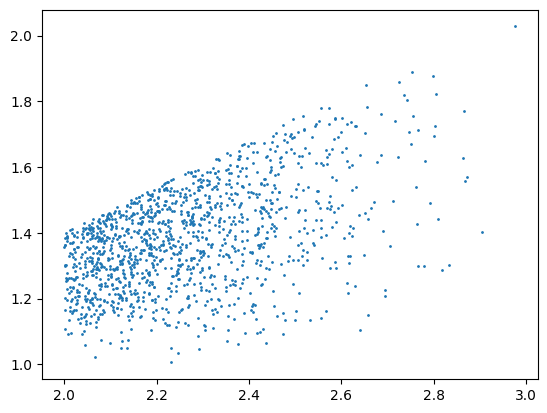

In [70]:
Energy_min, Energy_max = [2, 3]
thetamin, thetamax = [0, 25]
need = np.where(
    (data["theta"][test_index] < thetamax) & (data["theta"][test_index] > thetamin)
)
print(len(need[0]))

reg = LinearRegression().fit(
    data["S50"][test_index][need].reshape(-1, 1), data["prie"][test_index][need]
)
data["prie_S50"] = reg.predict(data["S50"].reshape(-1, 1))
need = np.where(
    (data["theta"][test_index] < thetamax)
    & (data["theta"][test_index] > thetamin)
    & (data["prie"][test_index] > Energy_min)
    & (data["prie"][test_index] < Energy_max)
    &(data["prie_S50"][test_index] < data["prie"][test_index]*0.7)
)
print(len(need[0]))
plt.scatter(data["prie"][test_index][need], data["prie_S50"][test_index][need], s=1)

0.20647668916050488
0.2699486534825116
0.4759577507238329
=====
0.27913342049022205
0.27913342049022205
0.27913342049022205


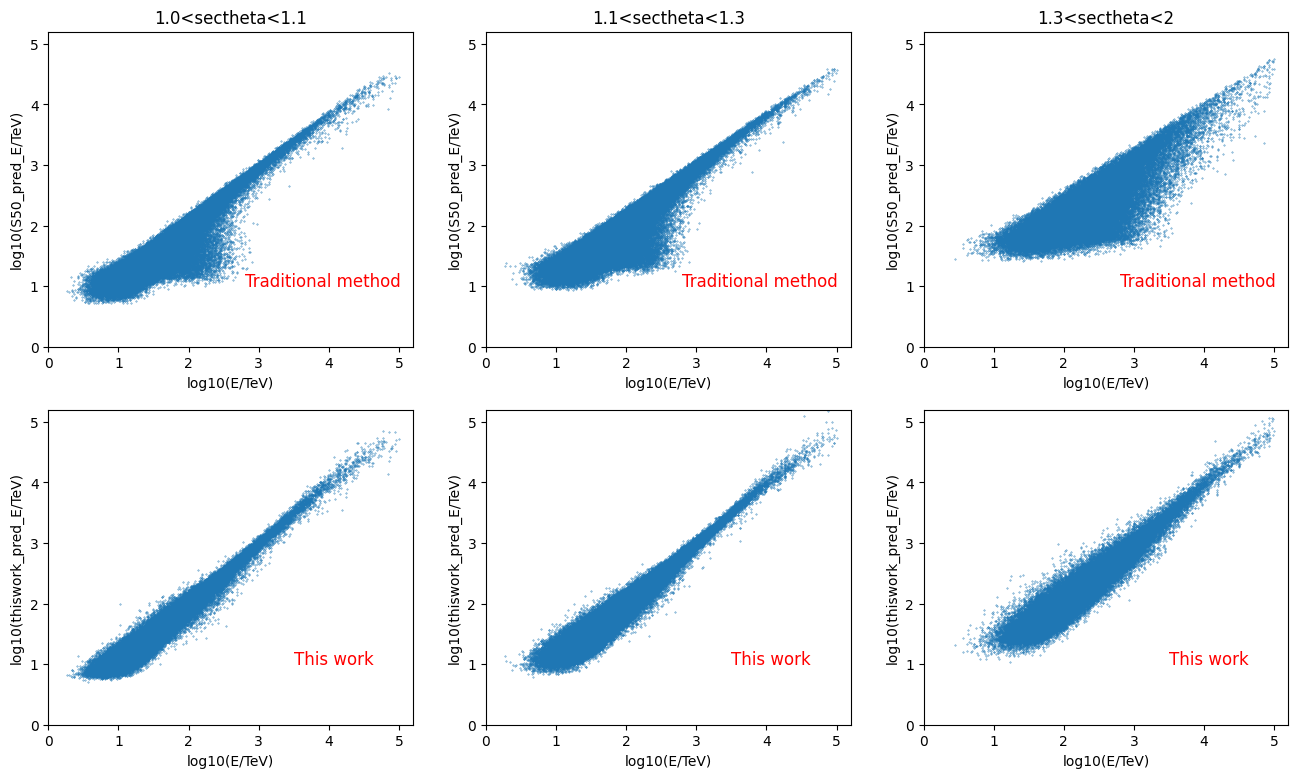

In [31]:
plt.figure(figsize=(16,9))
i=1
title_list = ["1.0<sectheta<1.1","1.1<sectheta<1.3","1.3<sectheta<2"]
data["prie_S50"] = np.zeros_like(data["prie"])
for thetamin,thetamax in [[0,25],[25,40],[40,60]]:
    need = np.where((data["theta"][test_index]<thetamax)&(data["theta"][test_index]>thetamin))
    reg = LinearRegression().fit(data["S50"][test_index][need].reshape(-1, 1),data["prie"][test_index][need])
    tmp  = reg.predict(data["S50"][test_index][need].reshape(-1, 1))
    data["prie_S50"][np.array(test_index)[need]] = tmp
    data["prie_S50"][test_index][need] = tmp
    plt.subplot(2,3,i)
    plt.scatter(data["prie"][test_index][need],data["prie_S50"][test_index][need],s=0.1)
    plt.text(2.8,1,"Traditional method",c="r",size="large")
    plt.xlabel("log10(E/TeV)")
    plt.ylabel("log10(S50_pred_E/TeV)")
    plt.title(title_list[i-1])
    plt.ylim(0,5.2)
    plt.xlim(0,5.2)
    i+=1
#     need = np.where(
#     (data["theta"][test_index] < thetamax)
#     & (data["theta"][test_index] > thetamin)
#     & (data["prie_S50"][test_index] > 2)
#     & (data["prie_S50"][test_index] < 2.5)
# )
#     print(np.log(10**np.std(data["prie_S50"][test_index][need]-data["prie"][test_index][need])))
#     need = np.where(
#     (data["theta"][test_index] < thetamax)
#     & (data["theta"][test_index] > thetamin)
#     & (data["prie_S50"][test_index] > 1.6)
#     & (data["prie_S50"][test_index] < 1.8)
# )
#     print(np.log(10**np.std(data["prie_S50"][test_index][need]-data["prie"][test_index][need])))
    need = np.where(
    (data["prie_S50"][test_index] > 2)
    & (data["prie_S50"][test_index] < 2.5)
)
    print(np.log(10**np.std(data["prie_S50"][test_index][need]-data["prie"][test_index][need])))
print("=====")
for thetamin,thetamax in [[0,25],[25,40],[40,60]]:
    plt.subplot(2,3,i)
    need = np.where((data["theta"][test_index]<thetamax)&(data["theta"][test_index]>thetamin))
    plt.scatter(data["prie"][test_index][need],data["prie_ag"][test_index][need],s=0.1)
    plt.text(3.5,1,"This work",c="r",size="large")
    plt.xlabel("log10(E/TeV)")
    plt.ylabel("log10(thiswork_pred_E/TeV)")
    plt.ylim(0,5.2)
    plt.xlim(0,5.2)
    i+=1
#     need = np.where(
#     (data["theta"][test_index] < thetamax)
#     & (data["theta"][test_index] > thetamin)
#     & (data["prie_ag"][test_index] > 2)
#     & (data["prie_ag"][test_index] < 2.5)
# )
#     print(np.log(10**np.std(data["prie_ag"][test_index][need]-data["prie"][test_index][need])))
#     need = np.where(
#     (data["theta"][test_index] < thetamax)
#     & (data["theta"][test_index] > thetamin)
#     & (data["prie_ag"][test_index] > 1.6)
#     & (data["prie_ag"][test_index] < 1.8)
# )
#     print(np.log(10**np.std(data["prie_ag"][test_index][need]-data["prie"][test_index][need])))
    need = np.where(
        (data["prie_ag"][test_index] > 2)
    & (data["prie_ag"][test_index] < 2.5)
)
    print(np.log(10**np.std(data["prie_ag"][test_index][need]-data["prie"][test_index][need])))

In [127]:
need = np.where(
(data["prie_S50"][test_index] > 2)
& (data["prie_S50"][test_index] < 2.5)
)
print(np.log(10**np.std(data["prie_S50"][test_index][need]-data["prie"][test_index][need])))
need = np.where(
    (data["prie_ag"][test_index] > 2)
& (data["prie_ag"][test_index] < 2.5)
)
print(np.log(10**np.std(data["prie_ag"][test_index][need]-data["prie"][test_index][need])))

0.4759577507238329
0.27913342049022205


In [131]:
(0.4759577507238329-0.27913342049022205)/0.27913342049022205

0.7051263510042701

In [22]:
data["prie"]

array([2.50508407, 2.10415078, 1.580451  , ..., 1.35609427, 0.88739038,
       1.43695491])

In [59]:
for Energy_min,Energy_max in [[np.log10(40),np.log10(80)],[2,3]]:
    for thetamin,thetamax in [[0,25],[25,40],[40,60]]:
        need = np.where((data["theta"][test_index]<thetamax)&(data["theta"][test_index]>thetamin)&(data["prie_ag"][test_index]>Energy_min)&(data["prie_ag"][test_index]<Energy_max))
        need_S50 = np.where((data["theta"][test_index]<thetamax)&(data["theta"][test_index]>thetamin))
        reg = LinearRegression().fit(data["S50"][test_index][need_S50].reshape(-1, 1),data["prie"][test_index][need_S50])
        data["prie_S50"] = reg.predict(data["S50"].reshape(-1, 1))
        print(np.log(10**np.std(data["prie_ag"][test_index][need]-data["prie"][test_index][need])))
        print(np.log(10**np.std(data["prie_S50"][test_index][need]-data["prie"][test_index][need])))
#         print(1-10**-np.std(data["prie_ag"][test_index][need]-data["prie"][test_index][need]))
#         print(1-10**-np.std(data["prie_S50"][test_index][need]-data["prie"][test_index][need]))
        print("=====")

0.20671116232845183
0.31156989659174034
=====
0.27451623153499866
0.37860060799447837
=====
0.38432366107990257
0.3952392518456988
=====
0.17162247739492964
0.37345198470676394
=====
0.20802679089309922
0.4104872931398848
=====
0.34114494401301415
0.6541701290509149
=====


In [23]:
np.min(data["sumpf"])

1.6114042777171864

In [24]:
def twoPointAngle(theta1, theta2, phi1, phi2):
    return np.rad2deg(
        np.arccos(
            np.sin(np.deg2rad(theta1))
            * np.sin(np.deg2rad(theta2))
            * np.cos(np.deg2rad(phi1 - phi2))
            + np.cos(np.deg2rad(theta1)) * np.cos(np.deg2rad(theta2))
        )
    )
data["pritheta_pred"] = data["theta"]-data["deltatheta_ag"]
data["priphi_pred"] = data["phi"]-data["deltaphi_ag"]
data["delta_angle"] = twoPointAngle(data["pritheta"],data["theta"],data["priphi"],data["phi"])
data["delta_angle_pred"] = twoPointAngle(data["pritheta"],data["pritheta_pred"],data["priphi"],data["priphi_pred"])

In [25]:
sumpf_bins = np.linspace(1.6,4.5,20)
Angular_resolution = np.zeros(19)
Angular_resolution_pred = np.zeros(19)
for i in range(len(sumpf_bins)-1):
    need = np.where((data["sumpf"][test_index]>sumpf_bins[i])&(data["sumpf"][test_index]<sumpf_bins[i+1]) )
    Angular_resolution[i] = np.median(data["delta_angle"][test_index][need])
    Angular_resolution_pred[i] = np.median(data["delta_angle_pred"][test_index][need])    

In [26]:
Angular_resolution

array([1.11497267, 0.89652671, 0.66558503, 0.51732502, 0.43808012,
       0.38366133, 0.33656664, 0.29970345, 0.27060918, 0.24065811,
       0.21860906, 0.20096111, 0.18782121, 0.17757102, 0.1761224 ,
       0.17219132, 0.17685333, 0.1885291 , 0.210159  ])

In [27]:
Angular_resolution_pred

array([0.7319053 , 0.67194053, 0.56597993, 0.47626519, 0.4004127 ,
       0.34096927, 0.28864629, 0.24531736, 0.21096168, 0.18042576,
       0.15567125, 0.13563604, 0.1204119 , 0.10974806, 0.09803166,
       0.09363538, 0.09080992, 0.0929105 , 0.10112471])

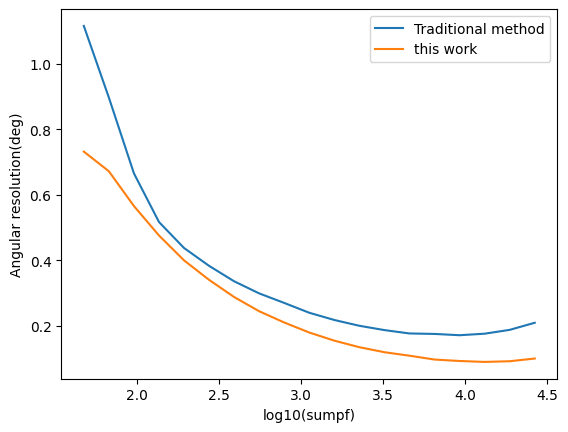

In [29]:
sumpf_bins_center = (sumpf_bins[:-1] + sumpf_bins[1:]) / 2
plt.plot(sumpf_bins_center, Angular_resolution, label="Traditional method")
plt.plot(sumpf_bins_center, Angular_resolution_pred, label="this work")
plt.xlabel("log10(sumpf)")
plt.ylabel("Angular resolution(deg)")
plt.legend()
plt.show()